In [3]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend 
import matplotlib.pyplot as plt
%matplotlib inline
backend.clear_session()

In [4]:
model = VGG16(weights='imagenet')

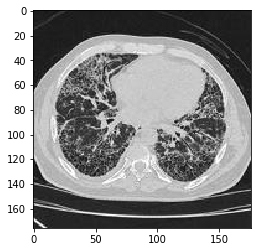

In [5]:
img_path = 'ild.jpg'
img=mpimg.imread(img_path)
plt.imshow(img)

In [6]:
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))

In [7]:
x = image.img_to_array(img)

In [8]:
import numpy as np
x = np.expand_dims(x, axis=0)

In [9]:
x.shape

(1, 224, 224, 3)

In [10]:
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)

In [11]:
x

array([[[[-71.939   , -84.779   , -91.68    ],
         [-72.939   , -85.779   , -92.68    ],
         [-72.939   , -85.779   , -92.68    ],
         ...,
         [-73.939   , -86.779   , -93.68    ],
         [-73.939   , -86.779   , -93.68    ],
         [-74.939   , -87.779   , -94.68    ]],

        [[-73.939   , -86.779   , -93.68    ],
         [-74.939   , -87.779   , -94.68    ],
         [-74.939   , -87.779   , -94.68    ],
         ...,
         [-71.939   , -84.779   , -91.68    ],
         [-71.939   , -84.779   , -91.68    ],
         [-72.939   , -85.779   , -92.68    ]],

        [[-73.939   , -86.779   , -93.68    ],
         [-74.939   , -87.779   , -94.68    ],
         [-74.939   , -87.779   , -94.68    ],
         ...,
         [-71.939   , -84.779   , -91.68    ],
         [-71.939   , -84.779   , -91.68    ],
         [-72.939   , -85.779   , -92.68    ]],

        ...,

        [[-60.939003, -73.779   , -80.68    ],
         [-62.939003, -75.779   , -82.68    ]

In [12]:
import pandas as pd
from keras.applications.vgg16 import decode_predictions
preds = model.predict(x)
#cut the first column (iloc[col,row])
predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
print('PREDICTION:',predictions.loc[0,'category'])


PREDICTION: Petri_dish


Text(0.5, 1.0, 'Top 3 Predictions:')

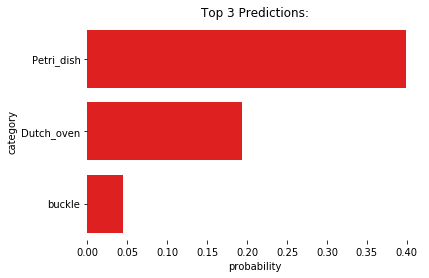

In [13]:
import seaborn as sns
f = sns.barplot(x='probability',y='category',data=predictions,color="red")
sns.set_style(style='white')
f.grid(False)
f.spines["top"].set_visible(False)
f.spines["right"].set_visible(False)
f.spines["bottom"].set_visible(False)
f.spines["left"].set_visible(False)
f.set_title('Top 3 Predictions:')

In [50]:
argmax = np.argmax(preds[0])

In [51]:
output = model.output[:, argmax]

In [52]:
last_conv_layer = model.get_layer('block5_conv3')

In [54]:
grads = backend.gradients(output, last_conv_layer.output)[0]

<tf.Tensor 'gradients_11/block5_pool/MaxPool_grad/MaxPoolGrad:0' shape=(?, 14, 14, 512) dtype=float32>

In [27]:
pooled_grads = backend.mean(grads, axis=(0, 1, 2))

In [28]:
iterate = backend.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [29]:
pooled_grads_value, conv_layer_output_value = iterate([x])

In [30]:
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

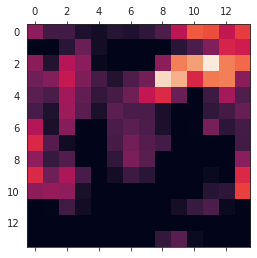

In [31]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [32]:
import cv2
img = cv2.imread(img_path)

In [33]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

In [34]:
heatmap = np.uint8(255*heatmap)

In [35]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [36]:
hif = .8

In [37]:
superimposed_img = heatmap * hif + img

In [38]:
output = 'output.jpeg'
cv2.imwrite(output, superimposed_img)

img=mpimg.imread(output)

Text(0.5, 1.0, 'Petri_dish')

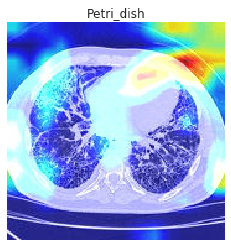

In [39]:
plt.imshow(img)
plt.axis('off')
plt.title(predictions.loc[0,'category'])

In [47]:

test = backend.gradients([6,8],[1,2,3])
test[0]
